# 1.Build a decision tree classifier:

In [51]:
#Import diabetes datasets

import pandas as pd
import numpy as np
dataset = pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
#Split it into X and Y
x = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 8].values

In [56]:
#Split X and Y into 70% training set and 30% testing set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Function to perform training with gini Index. 


In [57]:
#Train a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

# Creating the classifier object 
clf_gini = DecisionTreeClassifier(criterion = "gini", 
    random_state = 100,max_depth=3, min_samples_leaf=5) 

# clf_gini = DecisionTreeClassifier(criterion = "entropy", 
#     random_state = 100,max_depth=3, min_samples_leaf=5)

# Performing training with gini index
clf_gini.fit(x_train, y_train) 


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [58]:
clf_gini

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

[Text(0.5, 0.875, 'X[1] <= 144.5\ngini = 0.462\nsamples = 537\nvalue = [343, 194]'),
 Text(0.25, 0.625, 'X[7] <= 28.5\ngini = 0.368\nsamples = 412\nvalue = [312, 100]'),
 Text(0.125, 0.375, 'X[5] <= 30.45\ngini = 0.203\nsamples = 218\nvalue = [193, 25]'),
 Text(0.0625, 0.125, 'gini = 0.037\nsamples = 106\nvalue = [104, 2]'),
 Text(0.1875, 0.125, 'gini = 0.326\nsamples = 112\nvalue = [89, 23]'),
 Text(0.375, 0.375, 'X[5] <= 26.35\ngini = 0.474\nsamples = 194\nvalue = [119, 75]'),
 Text(0.3125, 0.125, 'gini = 0.111\nsamples = 34\nvalue = [32, 2]'),
 Text(0.4375, 0.125, 'gini = 0.496\nsamples = 160\nvalue = [87, 73]'),
 Text(0.75, 0.625, 'X[5] <= 29.95\ngini = 0.373\nsamples = 125\nvalue = [31, 94]'),
 Text(0.625, 0.375, 'X[4] <= 117.5\ngini = 0.499\nsamples = 25\nvalue = [13, 12]'),
 Text(0.5625, 0.125, 'gini = 0.444\nsamples = 18\nvalue = [12, 6]'),
 Text(0.6875, 0.125, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.875, 0.375, 'X[1] <= 157.5\ngini = 0.295\nsamples = 100\nvalue =

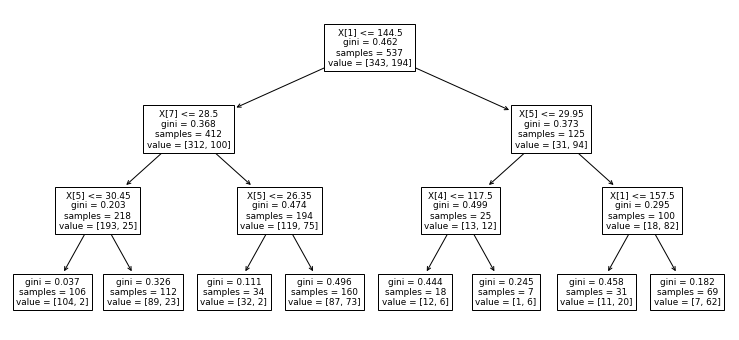

In [64]:
from matplotlib import pyplot as plt
from sklearn import tree
plt.figure(figsize=(13,6))
tree.plot_tree(clf_gini)

In [66]:
# Predicton on test with giniIndex 
y_pred_gini = clf_gini.predict(x_test) 
print("Predicted values:") 
print(y_pred_gini) 

Predicted values:
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0]


In [68]:
#Calculate its accuracy with gini index
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

# Function to calculate accuracy 
print("Confusion Matrix gini: ", confusion_matrix(y_test, y_pred)) 

Confusion Matrix gini:  [[140  17]
 [ 35  39]]


In [81]:
# Precision and recall
print("Report : ", classification_report(y_test, y_pred)) 

Report :                precision    recall  f1-score   support

           0       0.74      0.92      0.82       157
           1       0.67      0.32      0.44        74

    accuracy                           0.73       231
   macro avg       0.71      0.62      0.63       231
weighted avg       0.72      0.73      0.70       231



In [69]:
print ("Accuracy gini : ", 
accuracy_score(y_test,y_pred)*100) 

Accuracy gini :  77.48917748917748


### Function to perform training with entropy. 

In [71]:
# Decision tree with entropy 
clf_entropy = DecisionTreeClassifier( 
        criterion = "entropy", random_state = 100, 
        max_depth = 3, min_samples_leaf = 5) 

# Performing training 
clf_entropy.fit(x_train, y_train) 


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [72]:
clf_entropy

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

[Text(0.5, 0.875, 'X[1] <= 144.5\nentropy = 0.944\nsamples = 537\nvalue = [343, 194]'),
 Text(0.25, 0.625, 'X[5] <= 26.45\nentropy = 0.8\nsamples = 412\nvalue = [312, 100]'),
 Text(0.125, 0.375, 'X[7] <= 53.5\nentropy = 0.187\nsamples = 105\nvalue = [102, 3]'),
 Text(0.0625, 0.125, 'entropy = 0.085\nsamples = 94\nvalue = [93, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.684\nsamples = 11\nvalue = [9, 2]'),
 Text(0.375, 0.375, 'X[7] <= 28.5\nentropy = 0.9\nsamples = 307\nvalue = [210, 97]'),
 Text(0.3125, 0.125, 'entropy = 0.642\nsamples = 147\nvalue = [123, 24]'),
 Text(0.4375, 0.125, 'entropy = 0.994\nsamples = 160\nvalue = [87, 73]'),
 Text(0.75, 0.625, 'X[1] <= 166.5\nentropy = 0.808\nsamples = 125\nvalue = [31, 94]'),
 Text(0.625, 0.375, 'X[6] <= 0.331\nentropy = 0.949\nsamples = 68\nvalue = [25, 43]'),
 Text(0.5625, 0.125, 'entropy = 0.985\nsamples = 28\nvalue = [16, 12]'),
 Text(0.6875, 0.125, 'entropy = 0.769\nsamples = 40\nvalue = [9, 31]'),
 Text(0.875, 0.375, 'X[7] <= 57.5\nentrop

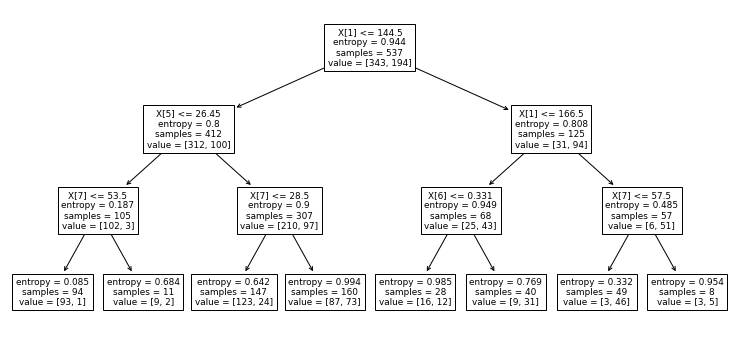

In [73]:
from matplotlib import pyplot as plt
from sklearn import tree
plt.figure(figsize=(13,6))
tree.plot_tree(clf_entropy)

In [76]:
# Predicton on test with giniIndex 
y_pred_entropy = clf_entropy.predict(x_test) 
print("Predicted values:") 
print(y_pred_entropy) 

Predicted values:
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0]


In [78]:
#Calculate its accuracy with entropy
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

# Function to calculate accuracy 
print("Confusion Matrix entropy: ", confusion_matrix(y_test, y_pred)) 

Confusion Matrix entropy:  [[145  12]
 [ 50  24]]


In [80]:
# Precision and recall
print("Report : ", classification_report(y_test, y_pred)) 

Report :                precision    recall  f1-score   support

           0       0.74      0.92      0.82       157
           1       0.67      0.32      0.44        74

    accuracy                           0.73       231
   macro avg       0.71      0.62      0.63       231
weighted avg       0.72      0.73      0.70       231



In [79]:
print ("Accuracy entropy : ", accuracy_score(y_test,y_pred)*100) 

Accuracy entropy :  73.16017316017316


# 2.Build a random tree classifier:

In [16]:
#Import diabetes datasets

import pandas as pd
import numpy as np
dataset = pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
dataset.shape

(768, 9)

In [38]:
#Split it into X and Y
x = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 8].values

In [39]:
dataset.iloc[:, 0:8].values

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [40]:
#Split X and Y into 70% training set and 30% testing set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [41]:
x_train.shape, y_test.shape

((537, 8), (231,))

In [42]:
y_train.shape, y_test.shape

((537,), (231,))

In [43]:
#Train a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0, max_features= 3, verbose =1)
classifier.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


RandomForestClassifier(max_features=3, n_estimators=20, random_state=0,
                       verbose=1)

In [44]:
#Make Predictions
y_pred = classifier.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


In [45]:
classifier.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_features=3, n_estimators=20, random_state=0,
                       verbose=1)>

In [48]:
#Calculate its accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))

[[140  17]
 [ 35  39]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.70      0.53      0.60        74

    accuracy                           0.77       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.77      0.77      0.77       231



In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.70      0.53      0.60        74

    accuracy                           0.77       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.77      0.77      0.77       231



In [47]:
print(accuracy_score(y_test, y_pred))

0.7748917748917749
